In [1]:
import pandas as pd
import scipy as sp
import seaborn as sns
import numpy as np
import statistics as stats
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('ZIV_12.xlsx', sheet_name='Данные')
pd.set_option('display.max_rows', None)
print(data)

        X     Y   C         D       E    F     G    H    I
0   142.3  57.2 NaN  Задача 1     NaN  NaN   NaN  NaN  NaN
1   159.1  68.9 NaN       X0=  147.05  dx=  8.92   r=  3.0
2   160.2  54.0 NaN       Y0=   56.95  dy=  7.75   s=  3.0
3   160.1  70.7 NaN     alfa=    0.08  NaN   NaN  NaN  NaN
4   151.8  52.2 NaN       NaN     NaN  NaN   NaN  NaN  NaN
5   158.7  55.5 NaN  Задача 2     NaN  NaN   NaN  NaN  NaN
6   158.0  62.4 NaN  X при Y=   55.00  NaN   NaN  NaN  NaN
7   149.0  61.2 NaN       NaN     NaN  NaN   NaN  NaN  NaN
8   159.3  69.1 NaN  Задача 3     NaN  NaN   NaN  NaN  NaN
9   154.4  66.0 NaN     alfa=    0.03  NaN   NaN  NaN  NaN
10  141.2  68.2 NaN       NaN     NaN  NaN   NaN  NaN  NaN
11  137.3  60.5 NaN       NaN     NaN  NaN   NaN  NaN  NaN
12  145.0  51.3 NaN       NaN     NaN  NaN   NaN  NaN  NaN
13  156.4  54.4 NaN       NaN     NaN  NaN   NaN  NaN  NaN
14  144.2  54.9 NaN       NaN     NaN  NaN   NaN  NaN  NaN
15  137.0  55.9 NaN       NaN     NaN  NaN   NaN  NaN  N

C:\Users\Vitaly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
x, y = list(data['X']), list(data['Y'])
y4fc = data.at[6, 'E']

In [4]:
vec = list(zip(x, y))
n = len(vec)

In [5]:
x_avg = stats.mean(x)
y_avg = stats.mean(y)
x_stdev = stats.pstdev(x)
y_stdev = stats.pstdev(y)
print('x среднее:',x_avg)
print('y среднее:', y_avg)
print('x стандартное отклонение:', x_stdev)
print('y стандартное отклонение:', y_stdev)

corr = stats.correlation(y, x)
print('Коэффицциент корреляции R:', corr)
eq1 = [(x, y_avg + corr * y_stdev/x_stdev * (x - x_avg) + y_stdev / x_stdev * math.sqrt(1 - corr**2) * math.sqrt(4*x_stdev**2 - (x - x_avg)**2)) for x in np.arange(x_avg - 2*x_stdev+0.0001, x_avg + 2*x_stdev-0.0001, 0.0001)]
eq2 = [(x, y_avg + corr * y_stdev/x_stdev * (x - x_avg) - y_stdev / x_stdev * math.sqrt(1 - corr**2) * math.sqrt(4*x_stdev**2 - (x - x_avg)**2)) for x in np.arange(x_avg - 2*x_stdev+0.0001, x_avg + 2*x_stdev-0.0001, 0.0001)]

stderr = math.sqrt(x_stdev**2 * (1 - corr**2))
print('Оценка стандартной ошибки прогноза:', stderr) 

x среднее: 150.81411764705882
y среднее: 61.29529411764706
x стандартное отклонение: 7.689552162300961
y стандартное отклонение: 6.438028669460002
Коэффицциент корреляции R: 0.2759180777318188
Оценка стандартной ошибки прогноза: 7.39105263540785


In [7]:
a = corr * x_stdev / y_stdev
b = x_avg - a * y_avg
print('Уравнение регрессии ξ на η: x = ', a, 'y + ', b, sep='')
print('Коэффициент линейной регрессии β =', a)

Уравнение регрессии ξ на η: x = 0.32955529715256626y + 130.6139287800637
Коэффициент линейной регрессии β = 0.32955529715256626


In [8]:
xexpected = a * y4fc + b
print('Прогноз при y = ', y4fc, ': x = ', xexpected, sep='')

Прогноз при y = 55.0: x = 148.73947012345485


In [9]:
x0 = data.at[1, 'E']
y0 = data.at[2, 'E']
dx = data.at[1, 'G']
dy = data.at[2, 'G']
r = int(data.at[1, 'I'])
s = int(data.at[2, 'I'])

interval1 = [x0 + i*dx for i in range(r-1)]
interval2 = [y0 + i*dy for i in range(s-1)]

xmin = min([y for x, y in eq2 + eq1]) - 5
xmax = max([y for x, y in eq2 + eq1]) + 5
ymin = min([x for x, y in eq2 + eq1]) - 5
ymax = max([x for x, y in eq2 + eq1]) + 5

(43.419236778756144, 79.17135145655178, 130.4351133224569, 171.19311332347797)

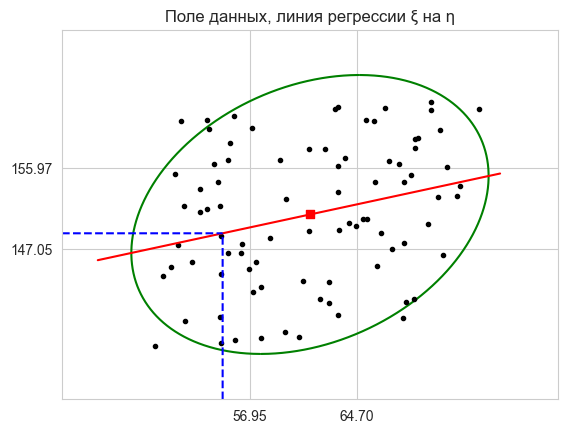

In [10]:
# plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.title('Поле данных, линия регрессии ξ на η')
# ellipsis
plt.plot([e1[1] for e1 in eq1], [e1[0] for e1 in eq1], 'g-')
plt.plot([e2[1] for e2 in eq2], [e2[0] for e2 in eq2], 'g-')
# dots
plt.plot(y, x, 'k.')
# regression line
plt.plot(np.arange(int(min([y for x, y in eq2 + eq1])) - 2, int(max([y for x, y in eq1 + eq2]) + 2)), [a * y + b for y in np.arange(int(min([y for x, y in eq2 + eq1])) - 2, int(max([y for x, y in eq1 + eq2]) + 2))], 'r-')
# ticks
plt.yticks(interval1)
plt.xticks(interval2)
# forecast line
plt.plot(np.arange(xmin, y4fc, 0.001), [xexpected] * np.arange(xmin, y4fc, 0.001).size, 'b--')
plt.plot([y4fc] * np.arange(ymin, xexpected, 0.001).size, np.arange(ymin, xexpected, 0.001), 'b--')
# center square
plt.scatter([y_avg], [x_avg], color='red', marker='s')
# axes limit
plt.axis(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

In [10]:
eq1 = [(y, x_avg + corr * x_stdev/y_stdev * (y - y_avg) + x_stdev / y_stdev * math.sqrt(1 - corr**2) * math.sqrt(4*y_stdev**2 - (y - y_avg)**2)) for y in np.arange(y_avg - 2*y_stdev+0.0001, y_avg + 2*y_stdev-0.0001, 0.0001)]
eq2 = [(y, x_avg + corr * x_stdev/y_stdev * (y - y_avg) - x_stdev / y_stdev * math.sqrt(1 - corr**2) * math.sqrt(4*y_stdev**2 - (y - y_avg)**2)) for y in np.arange(y_avg - 2*y_stdev+0.0001, y_avg + 2*y_stdev-0.0001, 0.0001)]